In [3]:
## INFS630 - Final project - Linear Regression Model
## Priyadharshini Sakthivel - priyadharshini.sakthivel@mail.mcgill.ca
## Vaishali Mishra - vaishali.mishra@mail.mcgill.ca
## REGRESSION - splitting the dataset into three seasons, building separate regression models, plotting temp vs hour of the day

In [4]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.cm as cm
import seaborn as sns
import time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
# read cleaned csv file
Data = pd.read_csv('/Users/vaishalimishra/Desktop/Winter_2023/INFS 630 - Data Mining/Final Project/Data/Data_prepped.csv',parse_dates=['readable_time'])

# drop unwanted columns
Data.drop(['Unnamed: 0'], inplace=True, axis=1)
Data

,readable_time,temp,lu_vege_pc
0,2022-06-01 00:00:00,18.282500,5.11
1,2022-06-01 01:00:00,17.802500,5.11
2,2022-06-01 02:00:00,17.190000,5.11
3,2022-06-01 03:00:00,16.790000,5.11
4,2022-06-01 04:00:00,16.507500,5.11
...,...,...,...
91950,2023-02-01 06:00:00,-0.613333,63.85
91951,2023-02-01 07:00:00,-0.615000,63.85
91952,2023-02-01 08:00:00,-0.620000,63.85
91953,2023-02-01 09:00:00,-0.620000,63.85


In [6]:
# create hour, month, day and unix time columns
Data['hour'] = Data['readable_time'].dt.hour
Data['month'] = Data['readable_time'].dt.month
Data['day'] = Data['readable_time'].dt.day
Data['unix_time']= Data['readable_time'].apply(lambda x: time.mktime(x.timetuple()))
Data

,readable_time,temp,lu_vege_pc,hour,month,day,unix_time
0,2022-06-01 00:00:00,18.282500,5.11,0,6,1,1.654056e+09
1,2022-06-01 01:00:00,17.802500,5.11,1,6,1,1.654060e+09
2,2022-06-01 02:00:00,17.190000,5.11,2,6,1,1.654063e+09
3,2022-06-01 03:00:00,16.790000,5.11,3,6,1,1.654067e+09
4,2022-06-01 04:00:00,16.507500,5.11,4,6,1,1.654070e+09
...,...,...,...,...,...,...,...
91950,2023-02-01 06:00:00,-0.613333,63.85,6,2,1,1.675249e+09
91951,2023-02-01 07:00:00,-0.615000,63.85,7,2,1,1.675253e+09
91952,2023-02-01 08:00:00,-0.620000,63.85,8,2,1,1.675256e+09
91953,2023-02-01 09:00:00,-0.620000,63.85,9,2,1,1.675260e+09


In [7]:
# slice for summer, fall and winter
summer = Data[(Data.month == 6) | (Data.month == 7) | (Data.month == 8)]
fall = Data[(Data.month == 9) | (Data.month == 10) | (Data.month == 11)]
winter = Data[(Data.month == 12) | (Data.month == 1) | (Data.month == 2)]

In [8]:
summer

,readable_time,temp,lu_vege_pc,hour,month,day,unix_time
0,2022-06-01 00:00:00,18.282500,5.11,0,6,1,1.654056e+09
1,2022-06-01 01:00:00,17.802500,5.11,1,6,1,1.654060e+09
2,2022-06-01 02:00:00,17.190000,5.11,2,6,1,1.654063e+09
3,2022-06-01 03:00:00,16.790000,5.11,3,6,1,1.654067e+09
4,2022-06-01 04:00:00,16.507500,5.11,4,6,1,1.654070e+09
...,...,...,...,...,...,...,...
88267,2022-08-31 19:00:00,22.466667,63.85,19,8,31,1.661987e+09
88268,2022-08-31 20:00:00,22.563333,63.85,20,8,31,1.661990e+09
88269,2022-08-31 21:00:00,22.690000,63.85,21,8,31,1.661994e+09
88270,2022-08-31 22:00:00,22.340000,63.85,22,8,31,1.661998e+09


In [9]:
# function to visualise seasonal data - temperature vs hour of the day
def visualize_temp_and_hour(a):
    a.pivot_table(values='temp',index='hour',columns='lu_vege_pc').reset_index().plot(x='hour', colormap=cm.cubehelix,figsize=(15,10))

In [11]:
# function to build regression model for 3 different seasons
def regression_model(a):
    tss = TimeSeriesSplit(n_splits=2)
    a.set_index('readable_time', inplace=True)
    a.sort_index(inplace=True) # training sets are always the past data since time series
    
    # dependent and independent variables
    x = a.drop(labels = ['temp','hour','month','day'],axis=1)
    y = a['temp']
    
    # split train and test sets
    for train_index, test_index in tss.split(x):
        X_train, X_test = x.iloc[train_index, :], x.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # print coefficients and constant
    c=lr.intercept_
    m=lr.coef_
    print(('c:{0}\n m:{1}').format(c,m))

    # using model on training dataset
    y_pred_train=lr.predict(X_train)
    # r2 and rmse
    r2_train = r2_score(y_train,y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train,squared=False)
    print('r squared for training set:{0}\n rmse for training set:{1}'.format(r2_train,rmse_train))

    # using model on testing dataset
    y_pred_test = lr.predict(X_test)
    # r2 and rmse
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test,squared=False)
    print('r squared for testing set:{0}\n rmse for testing set:{1}'.format(r2_test,rmse_test))

/var/folders/5_/gqjcy1zd0lvft1svn70698540000gn/T/ipykernel_35624/4270284745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_index(inplace=True) # training sets are always the past data since time series


c:-2092.2739024669077
 m:[-4.89401999e-03  1.27611265e-06]
r squared for training set:0.21085139383507645
 rmse for training set:3.8355096945120932
r squared for testing set:-1.2856183091753999
 rmse for testing set:6.071799437480256


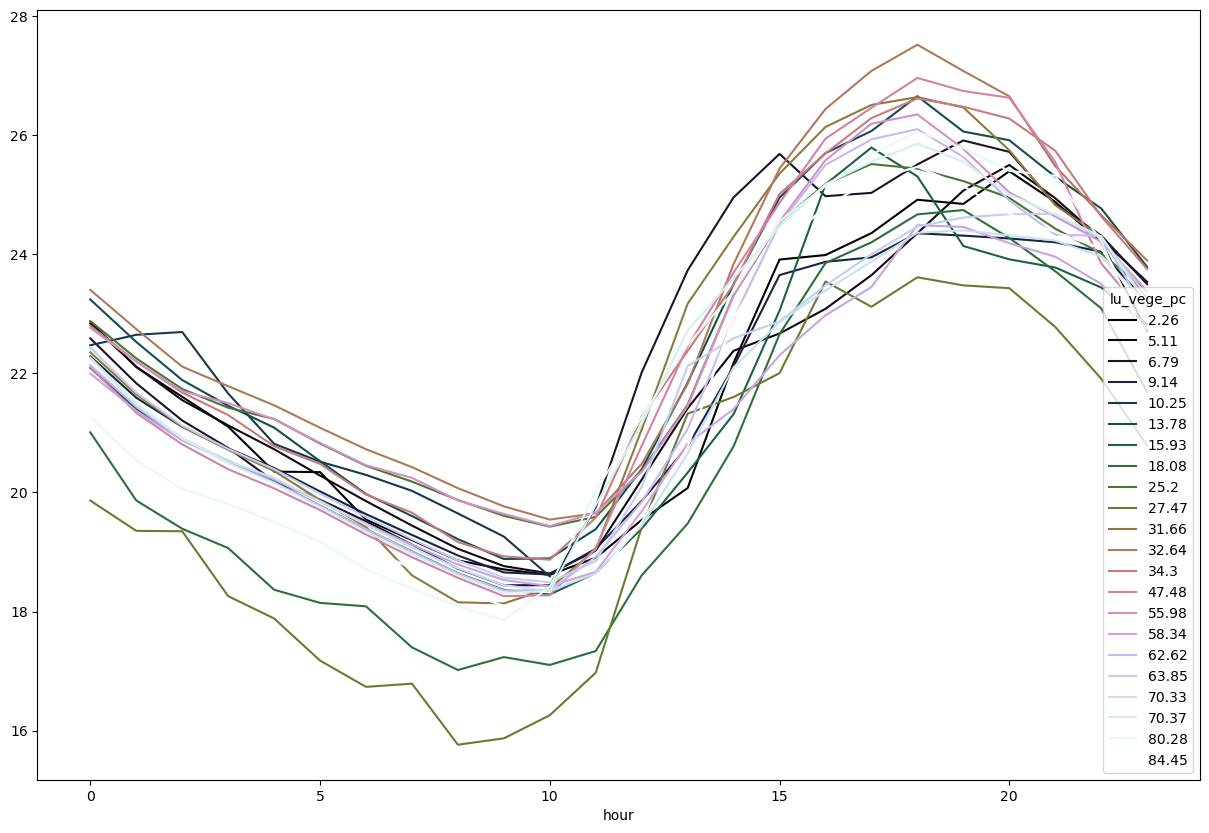

In [12]:
# SUMMER
visualize_temp_and_hour(summer)
regression_model(summer)

/var/folders/5_/gqjcy1zd0lvft1svn70698540000gn/T/ipykernel_35624/4270284745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_index(inplace=True) # training sets are always the past data since time series


c:3257.829867083459
 m:[-6.87206538e-03 -1.94845428e-06]
r squared for training set:0.2843557697071254
 rmse for training set:4.56803405502818
r squared for testing set:0.2568363875530941
 rmse for testing set:5.908236697059189


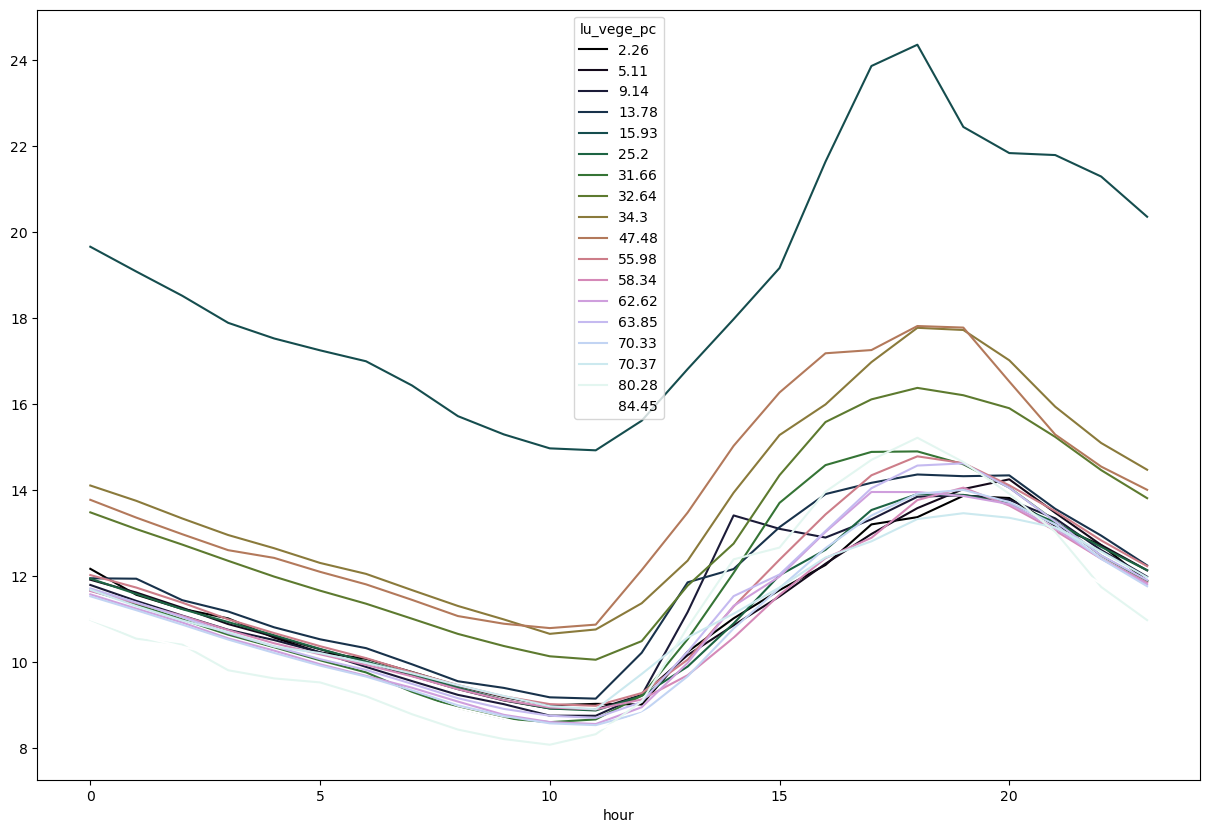

In [13]:
## FALL
visualize_temp_and_hour(fall)
regression_model(fall)

/var/folders/5_/gqjcy1zd0lvft1svn70698540000gn/T/ipykernel_35624/4270284745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_index(inplace=True) # training sets are always the past data since time series


c:874.293847428954
 m:[-2.67591687e-03 -5.23301959e-07]
r squared for training set:0.014070066148703653
 rmse for training set:4.456842770845734
r squared for testing set:-0.34211334618760114
 rmse for testing set:4.065868005454454


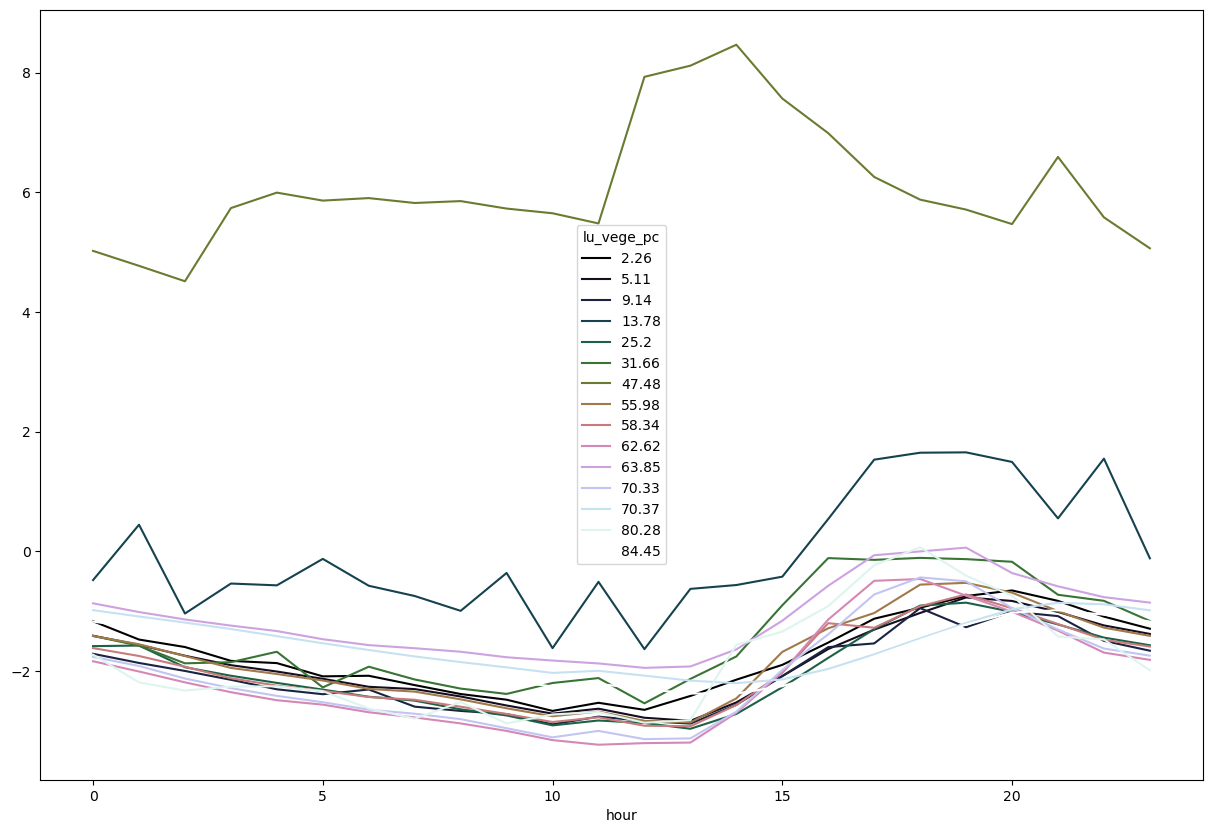

In [14]:
# WINTER
visualize_temp_and_hour(winter)
regression_model(winter)